In [2]:
x = {1: "a", 2: "b"}
y = {1: "a", 2: "c"}





In [3]:
import matplotlib.pyplot as plt
import numpy as np



In [4]:
import sqlite3 as sq

with sq.connect("Bot/db/database.sqlite") as db:
    db.execute("create table if not exists league_history (id INTEGER not null primary key autoincrement,puuid TEXT not null,timestamp DATETIME not null DEFAULT CURRENT_TIMESTAMP,lp INTEGER,division TEXT,tier TEXT);")

In [5]:
import sqlite3 as sq
from pprint import pprint

with sq.connect("Bot/db/database.sqlite") as db:
    x = db.execute("SELECT * FROM league_history")
    pprint(x.fetchall())

[(1,
  'sf3YevkbcGcy6M1cMcMQvv6OZN1bjd3z6ObWRUUFZnV69a1H',
  '2023-09-20 14:07:28',
  19,
  'I',
  'GOLD',
  None,
  None),
 (2,
  'U8wuwtnLQ7EDwZgg75luKCo58ZAYW_0IZGkd7UwxqPgWYl-b',
  '2023-09-22 14:24:06',
  33,
  'II',
  'PLATINUM',
  None,
  None),
 (3,
  '8n2_nSjCcO8lcHq4P1bFV03JDRl6weCut00yM9MEEiKXFK0',
  '2023-09-22 14:24:06',
  11,
  'III',
  'GOLD',
  None,
  None),
 (4,
  'U8wuwtnLQ7EDwZgg75luKCo58ZAYW_0IZGkd7UwxqPgWYl-b',
  '2023-09-26 10:25:13',
  79,
  'IV',
  'EMERALD',
  None,
  None),
 (5,
  'sf3YevkbcGcy6M1cMcMQvv6OZN1bjd3z6ObWRUUFZnV69a1H',
  '2023-09-26 10:40:14',
  20,
  'IV',
  'PLATINUM',
  None,
  None),
 (6,
  '8n2_nSjCcO8lcHq4P1bFV03JDRl6weCut00yM9MEEiKXFK0',
  '2023-09-26 10:40:14',
  46,
  'IV',
  'GOLD',
  None,
  None),
 (7,
  'lv5uc0LjLWuJsfzHJyxemJ1TmR1D24rLftnM8mlhvVj842U',
  '2023-09-26 12:50:10',
  48,
  'IV',
  'PLATINUM',
  2,
  3),
 (8,
  'YLfSXmCOkBKx_SKn5Hl0I8u0AeLXrK_YICYkbwo_gTqxY9U',
  '2023-09-26 12:50:10',
  45,
  'I',
  'GOLD',
  7,
  13),
 

In [6]:
# statement = 

In [13]:
from Bot.utils.rank_sorting_class import Ranker
from pprint import pprint


# print(Ranker("Iron", "IV", "0")._score)
# print(Ranker("Iron", "I", "100"))


current_ticks = []
new_ticks = []
for league in Ranker.LEAGUES.keys():
    for subleague in Ranker.SUBLEAGUE.keys():
        x = Ranker(league, subleague, "0")
        current_ticks.append((x._score + 50))
        new_ticks.append(str(x).split(" - ")[0])

# print(Ranker("Iron", "I", 100)._score)
# print(Ranker("Bronze", "IV", 0)._score)
# print(Ranker("IRON", "IV", "0")._score)
# print(Ranker("IRON", "I", "100")._score)
# print(Ranker("BRONZE", "IV", "0")._score)
# print(Ranker("BRONZE", "I", "100")._score)
# print(Ranker("SILVER", "IV", "0")._score)

print(*zip(new_ticks, current_ticks), sep = "\n")
# new_ticks = new_ticks[::-1]
# current_ticks = 

('Iron IV', 50)
('Iron III', 150)
('Iron II', 250)
('Iron I', 350)
('Bronze IV', 451)
('Bronze III', 551)
('Bronze II', 651)
('Bronze I', 751)
('Silver IV', 852)
('Silver III', 952)
('Silver II', 1052)
('Silver I', 1152)
('Gold IV', 1253)
('Gold III', 1353)
('Gold II', 1453)
('Gold I', 1553)
('Platinum IV', 1654)
('Platinum III', 1754)
('Platinum II', 1854)
('Platinum I', 1954)
('Emerald IV', 2055)
('Emerald III', 2155)
('Emerald II', 2255)
('Emerald I', 2355)
('Diamond IV', 2456)
('Diamond III', 2556)
('Diamond II', 2656)
('Diamond I', 2756)
('Master', 2857)
('Master', 2957)
('Master', 3057)
('Master', 3157)


In [14]:
import datetime
datetime.datetime.now()

datetime.datetime(2023, 10, 20, 11, 1, 4, 944798)

In [79]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib
matplotlib.use("Agg")

max_date = 100

fig, ax= plt.subplots(figsize = (15,15))
x =np.arange(1, 100, 1)
# ax.scatter(x, x)

# ax.set_xlim(0, 100)
ax.set_ylim(0, 2800)


y_lim = plt.gca().get_ylim()[1]

opacity = 0.8

colours = ["#a19d94","#CD7F32","#C0C0C0","#FFD700","#E5E4E2","#50C878","#b9f2ff"]


ax.set_yticks(current_ticks, new_ticks)

# print(ax.gca().get_ylim())

# ax.plot((datetime.datetime.now(), datetime.datetime.now() + datetime.timedelta(1),datetime.datetime.now() + datetime.timedelta(2), datetime.datetime.now() + datetime.timedelta(4)), (str(Ranker("Silver", "II", 50)), str(Ranker("Silver", "II", 100)), Ranker("Silver", "I", 0)._score, Ranker("Gold", "IV", 0)._score))


for idx, colour in enumerate(colours):
    # print(current_ticks[idx])
    # ax.axvspan(0, max_date, ymin=(current_ticks[idx * 3] - 50)/y_lim, ymax=(current_ticks[(idx *3) + 3]-50)/y_lim, alpha = opacity, facecolor = colour)
    ax.axhspan(ymin=current_ticks[idx*4] - 50, ymax =current_ticks[idx*4 + 3]+51, facecolor = colour, alpha = opacity)
for idx, tick in enumerate(current_ticks):
    ax.axhline(y = current_ticks[idx], linewidth=1, color = "black", linestyle="dashed", dashes=(5, 10))


# ax.scatter(x=datetime.datetime.now(), y=2500, s = 100)

# ax.plot(
#     (datetime.datetime.now(), datetime.datetime.now() + datetime.timedelta(1),datetime.datetime.now() + datetime.timedelta(2), datetime.datetime.now() + datetime.timedelta(4)),
#     np.linspace(0, 2500, 4),
#     # s = 100
# )
# plt.gcf.autofmt_xdate()

import pickle
with open("my_fig.pickle", "wb") as f: 
    pickle.dump(fig, f)






plt.tight_layout()
# plt.show()

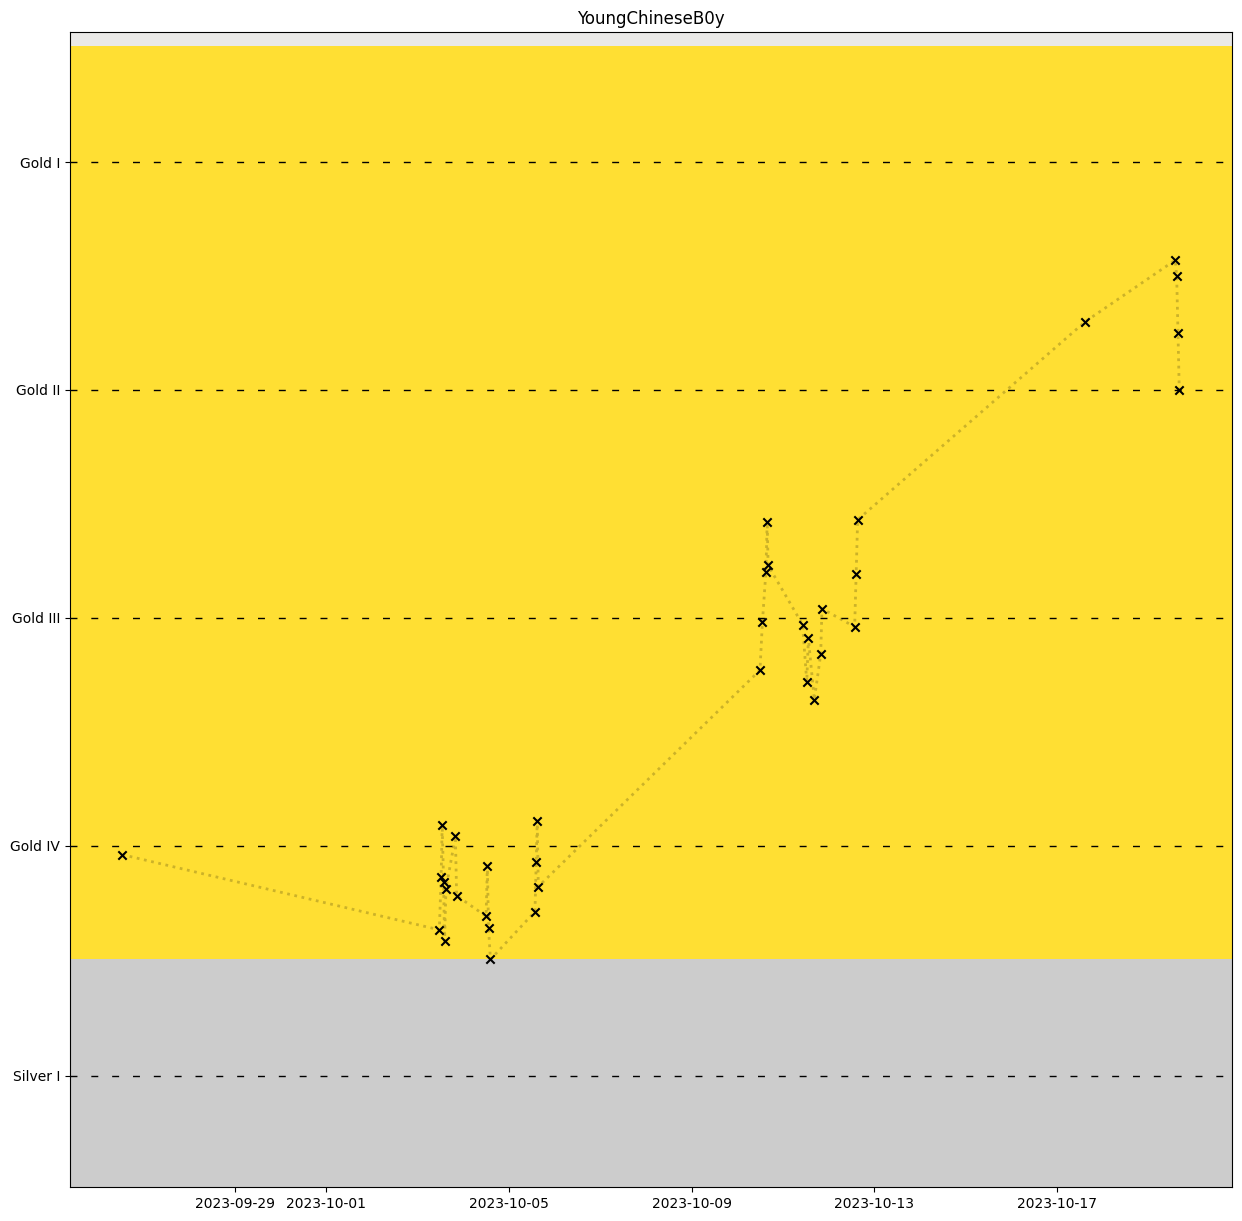

In [70]:
import aiosqlite as sqa
import matplotlib.pyplot as plt
import pickle
import datetime as dt

summonerid = "8n2_nSjCcO8lcHq4P1bFV03JDRl6weCut00yM9MEEiKXFK0"
with open("Bot/utils/my_fig.pickle") as f:
    fig = pickle.load(f)



async with sqa.connect("Bot/db/database.sqlite") as connection:
    async with connection.execute(
        "SELECT * FROM league_history WHERE puuid = ?", (summonerid, )) as cursor:
        x_to_plot = []
        y_to_plot = []
        async for point in cursor:
            x_to_plot.append(dt.datetime.strptime(point[2], '%Y-%m-%d %H:%M:%S'))
            lp, division, tier = point[3:6]
            y_to_plot.append(Ranker(*point[3:6][::-1])._score)
            # print(x_to_plot, y_to_plot)
        user = await connection.execute_fetchall("SELECT league_username FROM league_players WHERE puuid = ?", (summonerid, ))
        plt.title(user[0][0])
        plt.scatter(x_to_plot, y_to_plot, marker = "x", color = "black")
        plt.plot(x_to_plot, y_to_plot, linewidth = 2, color = "black", linestyle= ":", alpha = 0.2)
        plt.ylim((min(y_to_plot) - 100), (max(y_to_plot) + 100))
        # plt.tight_layout()
        plt.savefig("Bot/tmp/fig_to_send.jpg")

In [10]:
import datetime

datetime.datetime.now() + datetime.timedelta(1)

datetime.datetime(2023, 10, 16, 10, 53, 43, 519879)

In [11]:
for idx, colour in enumerate(colours):
    print(idx * 4, (idx * 4) + 3)
    # ax.axvspan(0, max_date, ymin=current_ticks[idx * 4]/y_lim, y_max=current_ticks[(idx *4) + 3])
    


0 3
4 7
8 11
12 15
16 19
20 23
24 27


In [77]:
plt.get_backend()

'module://matplotlib_inline.backend_inline'